<a href="https://colab.research.google.com/github/saadkhalidabbasi/EDA-Projects/blob/main/Summer_Olympics_Medals_(1896_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing DataSet
df=pd.read_csv('olympics_dataset.csv')
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [3]:
df.columns

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
print(df.dtypes)

player_id     int64
Name         object
Sex          object
Team         object
NOC          object
Year          int64
Season       object
City         object
Sport        object
Event        object
Medal        object
dtype: object


In [5]:
df.isnull().sum()

,0
player_id,0
Name,0
Sex,0
Team,0
NOC,0
Year,0
Season,0
City,0
Sport,0
Event,0


## **Analysis of participation and medal distribution based on Gender from Olympics'1896-2024**

In [6]:
Gender_part = df[['Year','Sex','player_id']]
Gender_part.drop_duplicates()

,Year,Sex,player_id
0,1992,M,0
1,2012,M,1
2,1920,M,2
3,1900,M,3
4,1932,F,26
...,...,...,...
252560,2024,F,4986655
252561,2024,F,9460001
252562,2024,M,1972077
252563,2024,M,1899865


In [7]:
participation = Gender_part.groupby(['Year','Sex']).count().reset_index()

In [8]:
part_pivot = participation.pivot(index = 'Year',columns = 'Sex')

### **To observe gender-wise participation from Olympics'1896-2024**

<Figure size 1200x600 with 0 Axes>

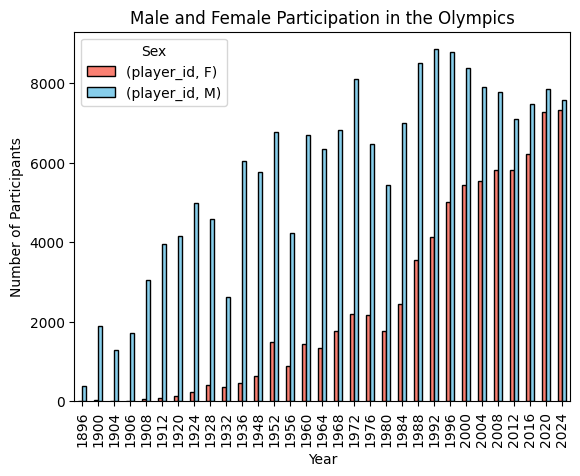

Number of Gender-wise participants each year
      player_id        
Sex          F       M
Year                  
1896       NaN   380.0
1900      33.0  1903.0
1904      16.0  1285.0
1906      11.0  1722.0
1908      47.0  3054.0
1912      87.0  3953.0
1920     134.0  4158.0
1924     244.0  4989.0
1928     404.0  4588.0
1932     347.0  2622.0
1936     468.0  6038.0
1948     628.0  5777.0
1952    1497.0  6773.0
1956     893.0  4234.0
1960    1435.0  6684.0
1964    1348.0  6354.0
1968    1777.0  6811.0
1972    2193.0  8111.0
1976    2172.0  6469.0
1980    1756.0  5435.0
1984    2447.0  7007.0
1988    3543.0  8494.0
1992    4124.0  8853.0
1996    5008.0  8772.0
2000    5431.0  8390.0
2004    5546.0  7897.0
2008    5816.0  7786.0
2012    5815.0  7105.0
2016    6223.0  7465.0
2020    7266.0  7855.0
2024    7312.0  7580.0


In [9]:
plt.figure(figsize=(12, 6))
part_pivot.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Male and Female Participation in the Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Sex')
plt.show()
print("Number of Gender-wise participants each year\n", part_pivot)

In [10]:
#subset with only [Gold, Silver, Bronze] labels_ No medal is fine too, getting to the olympics is a big deal :).
Legit_medals = df[df['Medal'] != 'No medal']

### **To observe distribution of medals between genders(M/F) from Olympics'1896-2024**

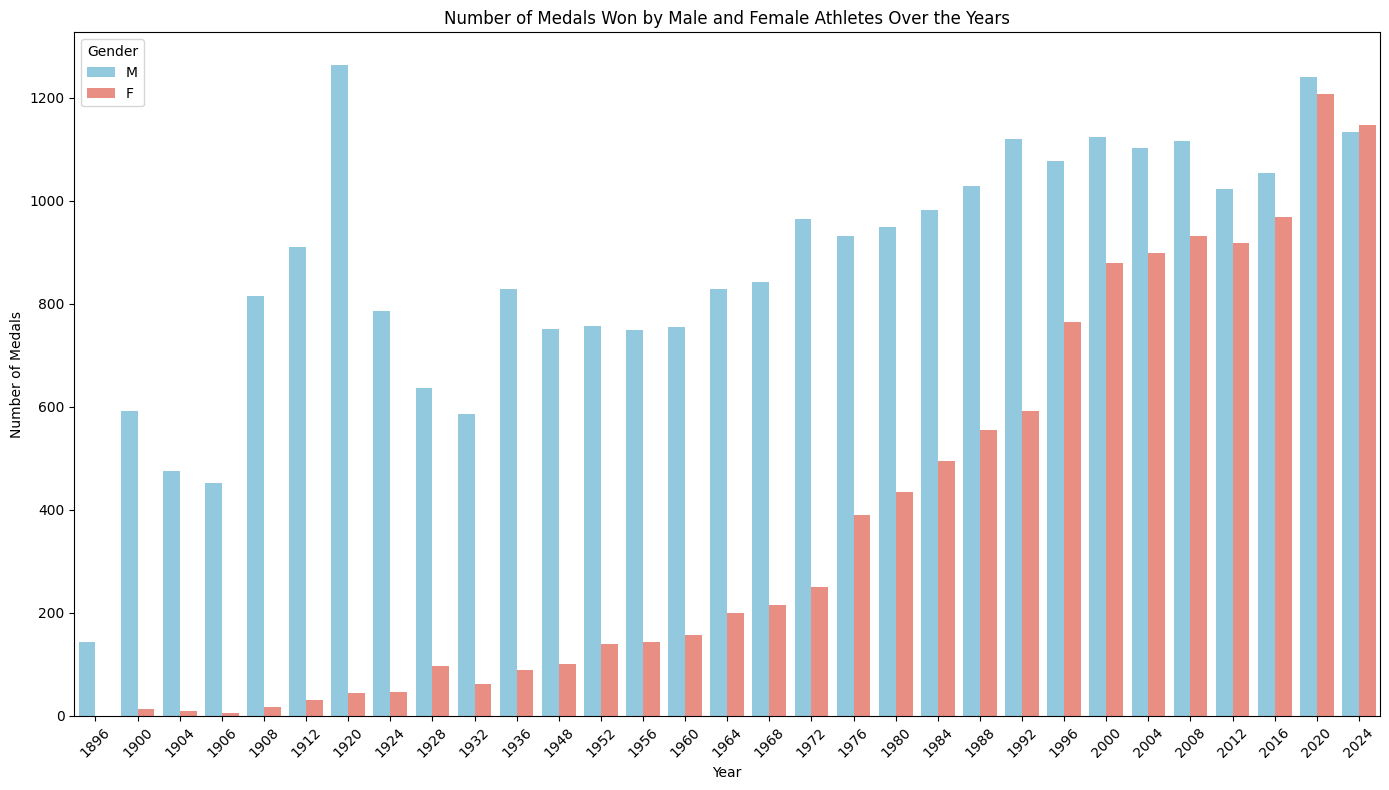

In [11]:
medal_counts_gender_years = Legit_medals.groupby(['Year', 'Sex']).size().reset_index(name='Number of Medals')

plt.figure(figsize=(14, 8))
sns.barplot(data=medal_counts_gender_years, x='Year', y='Number of Medals', hue='Sex', palette={'M': 'skyblue', 'F': 'salmon'})

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by Male and Female Athletes Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [12]:
Won_Medals = df[df['Medal']!='No medal'][['Year','Team','Medal']]

In [13]:
won_medal_counts = Won_Medals.groupby(['Year','Team']).count().reset_index()

### **Maximum number of medals won by each Team/Country from Olympics'1896-2024**

In [14]:
maxmedals_peryear = won_medal_counts.loc[won_medal_counts.groupby('Year')['Medal'].idxmax()]
maxmedals_peryear = maxmedals_peryear.rename(columns={'Medal': 'Medal Count'}).sort_values(by = 'Medal Count', ascending = False)
maxmedals_peryear.head()

,Year,Team,Medal Count
920,1980,Soviet Union,442
971,1984,United States,352
1865,2024,United States,321
1477,2008,United States,309
1019,1988,Soviet Union,300


In [15]:
maxmedals_peryear.tail()

,Year,Team,Medal Count
600,1952,United States,122
418,1928,United States,88
48,1900,France,75
162,1906,France,45
9,1896,Greece,44


### **Total number of participants from each Team/Country from Olympics'1896-2024**

In [16]:
Team_participation = df[['Year', 'Team', 'player_id']]
total_participations = Team_participation.groupby('Team').size().reset_index(name='Total Number of Participants')
total_participations.sort_values(by='Total Number of Participants',ascending = False)

,Team,Total Number of Participants
1105,United States,16236
425,Great Britain,11390
374,France,11360
520,Italy,9185
411,Germany,8622
...,...,...
137,Brandenburg,1
847,Ravel,1
142,Bremen,1
143,Brentina,1
